In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import C3XGate
# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit import BasicAer, Aer,execute
import mplhep
plt.style.use(mplhep.style.LHCb2)  # CMS or ATLAS/LHCb

In [2]:
import pandas as pd
filename = "weight_real_2x4.xlsx"
df = pd.read_excel(filename, header=None,
	index_col=None,
	engine='openpyxl')
print(df)


          0          1          2          3          4          5    \
0    4.421301   7.041151   2.235708   2.929070   2.555348   7.054674   
1    9.877626   3.129323   0.455392   8.566695   2.793797   6.090614   
2    7.108550   9.716221   7.814524   7.622729   4.341529   8.245194   
3    6.482317   3.821791   3.907426   5.550314   1.814576   7.661130   
4    4.472651   6.195384   7.119382   0.098167   6.103182   9.834731   
5    6.381450   5.381333   8.027472   2.468177   1.612609   1.095084   
6    2.497342   3.400043   2.377647   2.991422   0.581543   9.214766   
7    7.410348   1.494200   3.465051   4.682890   4.324252   0.389289   
8   24.206618  15.064717   8.533798  19.170077  10.254940  22.749343   
9   25.321650  23.632905  21.542755  17.702866  12.833738  16.784241   
10  19.782410  19.644318  16.548253  13.938982   6.564077  25.025653   
11  28.869176  20.535128  18.854349  20.970480  17.562760  24.559829   
12  23.329937  16.546541  13.859847  17.206597  11.293098  32.80

In [3]:
df.index = ['a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3', 'b4', '0011', '0101', '0110', '1001', '1010', '1100']

In [4]:
def cal_angle(df, step):
    angle_arr = []
    weight = 0
    for i in range(8):
        weight = df[step][i]
        angle_arr.append(math.acos(math.sqrt(float(weight/10))))
        
    return angle_arr

In [5]:
def solution(df, step):
    solution_arr = []
    origin = df[step][8:]
    solution_arr = sorted(origin, reverse = True)
    return solution_arr

In [6]:
print(solution(df, 1))

[25.11472886516675, 23.632904631899375, 20.535127712838108, 19.644317987414155, 16.54654106835289, 15.064716835085509]


In [63]:
def initialize_s(qc, n_qubit, num_matching):
    """Apply a H-gate to 'qubits' in qc"""
    qc.x(n_qubit - 1)
    #qc.x(4)
    qc.h(n_qubit - 1)
    for q in range(num_matching):
        qc.h(q)
    #qc.reset(num_qubit)
    #qc.h(num_qubit)
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [64]:
def diffuser(qc, nqubits, n_qubit):
    qc.barrier(list(range(n_qubit-1)))
    #qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    qc.barrier(list(range(nqubits-1)))
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    #U_s = qc.to_gate()
    #U_s.name = "diffuser"
    return qc

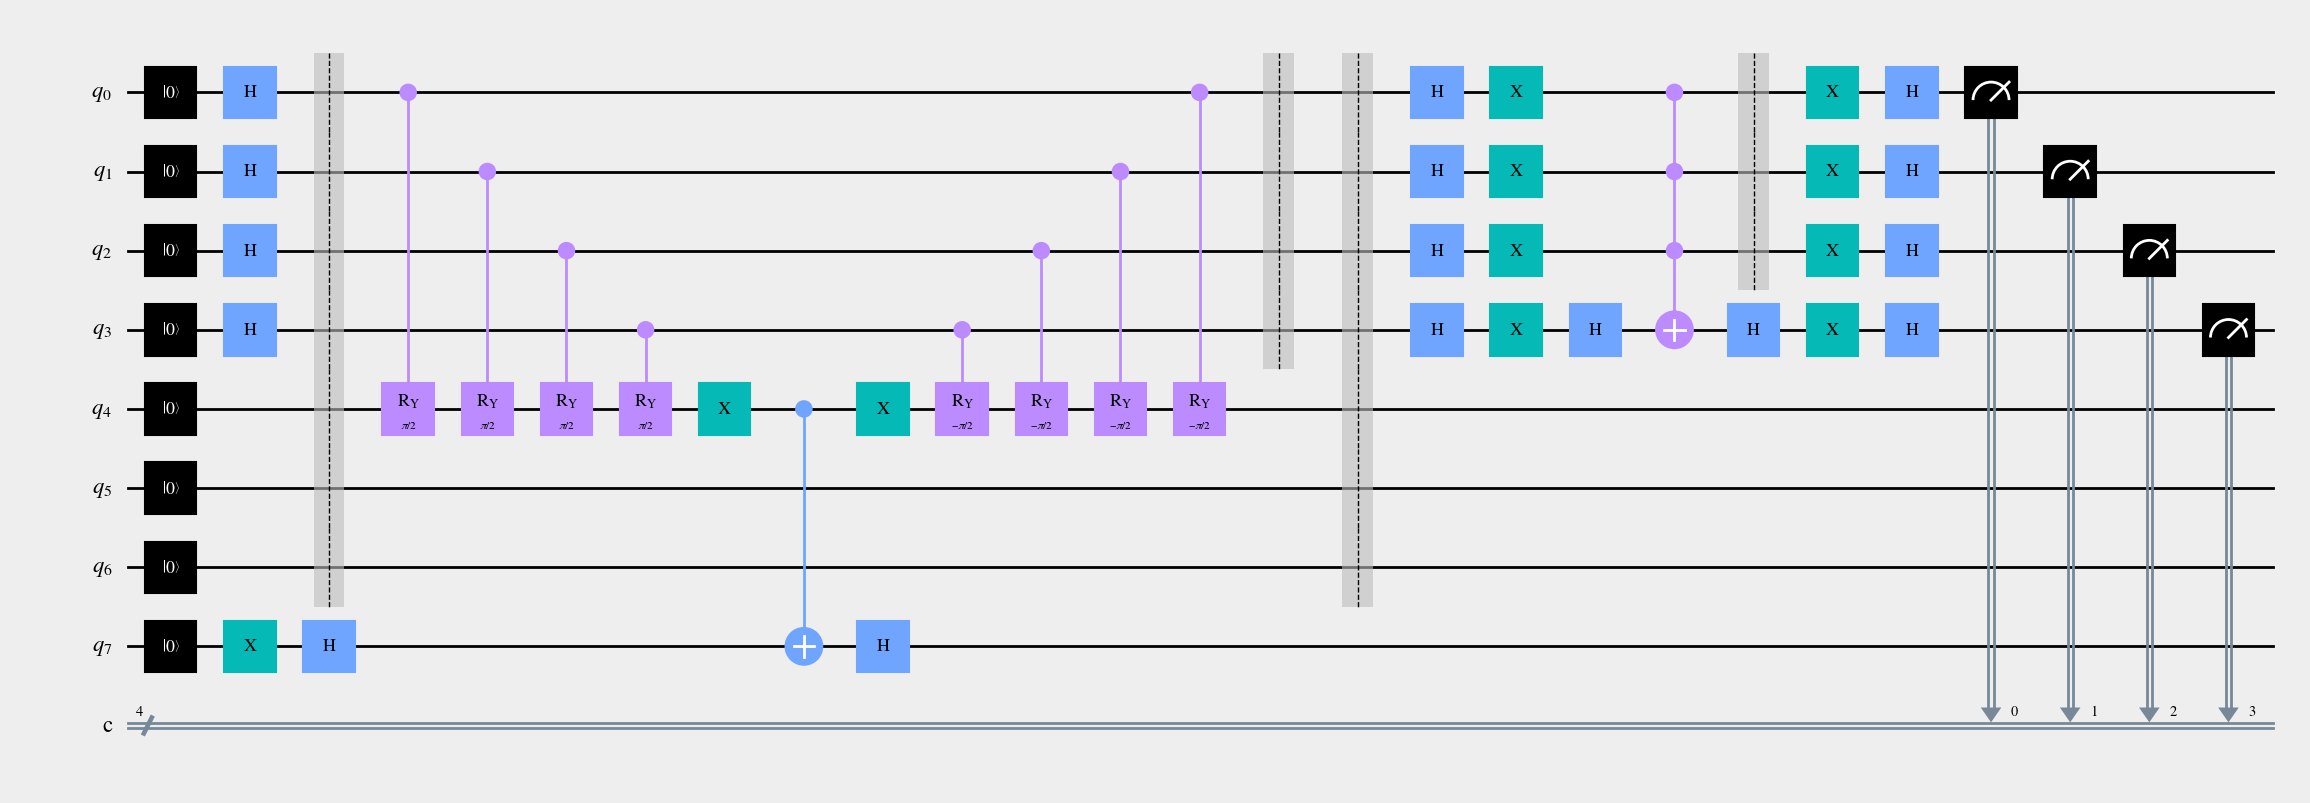

In [168]:
n_qubit = 8
n_matching = 4
grover_circuit = QuantumCircuit(n_qubit, n_matching)
grover_circuit.reset(range(0, n_qubit))
grover_circuit = initialize_s(grover_circuit, n_qubit, n_matching)
#grover_circuit.x(4)
for i in range(1):
    
    grover_circuit.cry(pi/2, 0, 4)
    grover_circuit.cry(pi/2, 1, 4)
    grover_circuit.cry(pi/2, 2, 4)
    grover_circuit.cry(pi/2, 3, 4)
    # grover_circuit.barrier([0, 1, 2, 3])
    # grover_circuit.mcx([0, 1, 2, 3], 6)
    # grover_circuit.barrier([0, 1, 2, 3])
    # grover_circuit.barrier([0, 1, 2, 3])
    # grover_circuit.x([0, 1, 2, 3])
    # grover_circuit.mcx([0, 1, 2, 3], 5)
    # grover_circuit.x([0, 1, 2, 3])
    # grover_circuit.barrier([0, 1, 2, 3, 4, 5, 6])
    grover_circuit.x([4])
    #grover_circuit.x(5)
    grover_circuit.mcx([4], 7)
    grover_circuit.x([4])
    grover_circuit.h(7)
    # grover_circuit.barrier([0, 1, 2, 3, 4, 5, 6])
    # grover_circuit.x([0, 1, 2, 3])
    # grover_circuit.mcx([0, 1, 2, 3], 5)
    # grover_circuit.x([0, 1, 2, 3])
    # grover_circuit.barrier([0, 1, 2, 3])
    # grover_circuit.barrier([0, 1, 2, 3])
    # grover_circuit.mcx([0, 1, 2, 3], 6)
    # grover_circuit.barrier([0, 1, 2, 3])
    grover_circuit.cry(-pi/2, 3, 4)
    grover_circuit.cry(-pi/2, 2, 4)
    grover_circuit.cry(-pi/2, 1, 4)
    grover_circuit.cry(-pi/2, 0, 4)
    #grover_circuit.rz(2*pi, 4)
    grover_circuit.barrier([0, 1, 2, 3])
    
    grover_circuit = diffuser(grover_circuit, 4, n_qubit)
grover_circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])
grover_circuit.draw(output='mpl', scale = 1.0, fold = 47, style={'backgroundcolor': '#EEEEEE'}, filename = "weighted2x4circuit.jpeg", plot_barriers = True)

In [169]:
from qiskit import BasicAer, Aer,execute
sim = Aer.get_backend('aer_simulator_statevector')
sim.set_options(device='CPU')
#sim = Aer.get_backend('aer_simulator')

In [170]:
job = execute(grover_circuit, backend = sim, shots = 100000)

In [171]:
counts = job.result().get_counts()

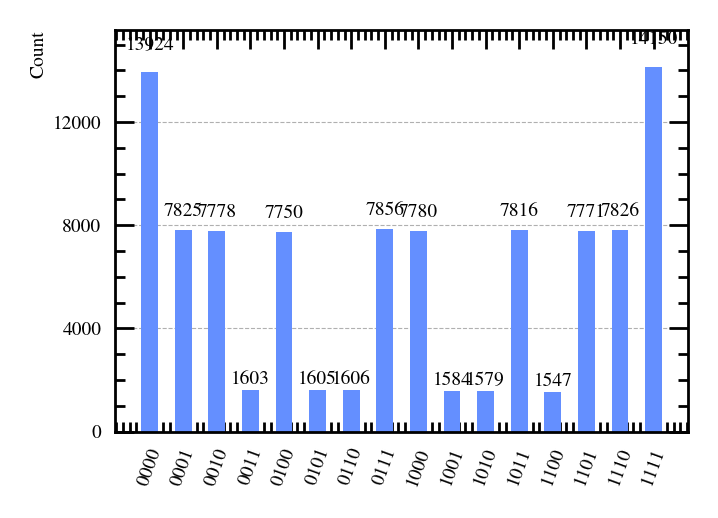

In [172]:
plot_histogram(counts)